In [61]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
train = train.dropna(axis = 0,subset=['Embarked'],how='any')

In [98]:
ID = test.PassengerId
train = train.drop(['PassengerId'],axis=1)
test = test.drop(['PassengerId'],axis=1)
train = train.drop(['Name'],axis=1)
test = test.drop(['Name'],axis=1)
train = train.drop(['Ticket'],axis=1)
test = test.drop(['Ticket'],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [99]:
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)

In [100]:
train['Age'].fillna(train['Age'].median(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)

In [101]:
train["Embarked"]= np.where(train["Embarked"]=="C",1,np.where(train["Embarked"]=="S",2,3))
test["Embarked"]= np.where(test["Embarked"]=="C",1,np.where(test["Embarked"]=="S",2,3))

In [102]:
train["Sex"]= np.where(train["Sex"]=="female",0,1)
test["Sex"]= np.where(test["Sex"]=="female",0,1)

In [103]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [104]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [105]:
train_Y = train['Survived']
train_X = train.drop('Survived',axis=1)
test_X = test

In [106]:
test_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,1
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [107]:
print(train_X.shape)
train_Y=train_Y.values.reshape(train_Y.shape[0],1)
print(train_Y.shape)
print(test_X.shape)

(889, 7)
(889, 1)
(418, 7)


In [108]:
train = train.drop(['Survived'],axis=1)

In [109]:
def sigmoid(input):
    output = 1 / (1 + np.exp(-input))
    return output

In [110]:
def costFunction(theta, X, y):
    m = y.size  
    J = 0
    h = sigmoid(np.dot(X, theta.T))
    J = 1/m * np.sum(-y*np.log(h) - (1-y) * np.log(1-h))
    return J

In [111]:
def gradientDecsent(iterations, alpha, x, y):
    m = x.shape[0]
    x = np.concatenate([np.ones((m, 1)), x], axis=1)
    y = np.array(y)
    y = np.reshape(y, (len(y),1))  
    theta = np.full((1, x.shape[1]), 0)
    # theta = theta.copy()
    cost_history = []
    for i in range(iterations):
        theta = theta - (alpha / m) * np.transpose(sigmoid(np.dot(x, theta.T)) - y).dot(x)
        cost_history.append(costFunction(theta, x, y))
        
    return theta, cost_history 

In [112]:
theta, cost_history = gradientDecsent(200000, 0.002, train_X, train_Y)
print(theta)

[[ 3.70030795 -0.8427771  -2.566677   -0.02884885 -0.31598277 -0.09342107
   0.00522164  0.07626175]]


Text(0, 0.5, 'Cost J')

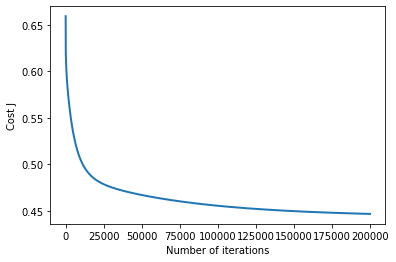

In [113]:
plt.plot(np.arange(len(cost_history)), cost_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J') 

In [114]:
x_ones = np.concatenate([np.ones((test_X.shape[0], 1)), test_X], axis=1)
x_ones

array([[ 1.    ,  3.    ,  1.    , ...,  0.    ,  7.8292,  3.    ],
       [ 1.    ,  3.    ,  0.    , ...,  0.    ,  7.    ,  2.    ],
       [ 1.    ,  2.    ,  1.    , ...,  0.    ,  9.6875,  3.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  3.    ,  1.    , ...,  0.    ,  8.05  ,  2.    ],
       [ 1.    ,  3.    ,  1.    , ...,  1.    , 22.3583,  1.    ]])

In [115]:
y_pred = sigmoid(np.dot(x_ones,theta.T))
y_pred

array([[0.10713753],
       [0.42291284],
       [0.11292735],
       [0.12176049],
       [0.58530323],
       [0.16827656],
       [0.63994681],
       [0.19663717],
       [0.6828082 ],
       [0.086759  ],
       [0.12133303],
       [0.32127748],
       [0.921298  ],
       [0.08339429],
       [0.83991682],
       [0.77336464],
       [0.21953802],
       [0.13163969],
       [0.56733345],
       [0.49694164],
       [0.22698954],
       [0.17098239],
       [0.91656569],
       [0.4970922 ],
       [0.91075018],
       [0.05093686],
       [0.92617254],
       [0.12677145],
       [0.35889449],
       [0.068108  ],
       [0.11690589],
       [0.17375342],
       [0.49427484],
       [0.54120724],
       [0.37454134],
       [0.1401079 ],
       [0.64281781],
       [0.68220132],
       [0.12855538],
       [0.15108773],
       [0.07821088],
       [0.45093166],
       [0.08440172],
       [0.79733055],
       [0.84161479],
       [0.12763685],
       [0.3151826 ],
       [0.129

In [116]:
y_pred_final = []
for i in y_pred:
  if i >= 0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
print(y_pred_final)

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [117]:
submission = {'PassengerId':ID,'Survived':y_pred_final}
submission = pd.DataFrame(submission)
submission.to_csv("Submission.csv", index=False)